<a href="https://colab.research.google.com/github/mafemanriquemoreno/Telecom_X_parte_2/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [7]:
import pandas as pd
import requests

print("--- Fase 1: Extracción de Datos desde la API ---")

url = "https://github.com/alura-cursos/challenge2-data-science-LATAM/raw/main/TelecomX_Data.json"

response = requests.get(url)

if response.status_code == 200:
    print("Conexión exitosa. Código de estado:", response.status_code)
    datos_brutos = pd.json_normalize(data=response.json())

    print(f"¡Extracción completada! Se han cargado {len(datos_brutos)} registros de clientes.")
    print("\nMostrando las primeras 5 filas de los datos extraídos:")
    display(datos_brutos.head())

else:
    print("Error al conectar con la API. Código de estado:", response.status_code)

--- Fase 1: Extracción de Datos desde la API ---
Conexión exitosa. Código de estado: 200
¡Extracción completada! Se han cargado 7267 registros de clientes.

Mostrando las primeras 5 filas de los datos extraídos:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [10]:
print(" Información General del DataFrame ")
datos_brutos.info()

print("\ Dimensiones del DataFrame (Filas, Columnas) ")
print(datos_brutos.shape)

 Información General del DataFrame 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tec

In [11]:
# Lista de columnas categóricas que se van a revisar
columnas_a_revisar = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'account.PaymentMethod']

print("Revisando Valores Únicos en Columnas Categóricas ")

for columna in columnas_a_revisar:
  valores_unicos = datos_brutos[columna].unique()
  print(f"\nValores únicos en la columna '{columna}':")
  print(valores_unicos)

# Verificaion de nuestra columna sospechosa
print("\nInvestigando la columna 'account.Charges.Total'")
print("Valores únicos iniciales (primeros 10):")
print(datos_brutos['account.Charges.Total'].unique()[:10])

Revisando Valores Únicos en Columnas Categóricas 

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'customer.gender':
['Female' 'Male']

Valores únicos en la columna 'customer.Partner':
['Yes' 'No']

Valores únicos en la columna 'customer.Dependents':
['Yes' 'No']

Valores únicos en la columna 'account.PaymentMethod':
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Investigando la columna 'account.Charges.Total'
Valores únicos iniciales (primeros 10):
['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']


In [13]:
# errors='coerce' transformará cualquier valor no numérico en 'NaN' (Not a Number).
cargos_totales_numericos = pd.to_numeric(datos_brutos['account.Charges.Total'], errors='coerce')

# Ahora, buscamos las filas donde la conversión falló (donde el resultado es NaN).
filas_con_errores = datos_brutos[cargos_totales_numericos.isnull()]

# Se mostrara las filas problemáticas para ver qué contienen
print(f"Se encontraron {len(filas_con_errores)} filas con valores no numéricos en 'account.Charges.Total'.")
print("\nMostrando las filas con inconsistencias:")
display(filas_con_errores)

Se encontraron 11 filas con valores no numéricos en 'account.Charges.Total'.

Mostrando las filas con inconsistencias:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [14]:
# Contamos cuántos valores tiene problema (' ') antes de la limpieza
conteo_antes = (datos_brutos['account.Charges.Total'] == ' ').sum()
print(f"Valores problemáticos (' ') antes de la limpieza: {conteo_antes}")

# Se reemplazaran los espacios en blanco con '0' .
datos_brutos.loc[datos_brutos['account.Charges.Total'] == ' ', 'account.Charges.Total'] = '0'

# Se vrifica el conteo
conteo_despues = (datos_brutos['account.Charges.Total'] == ' ').sum()
print(f"Valores problemáticos (' ') después de la limpieza: {conteo_despues}")

# Ahora que no hay texto, convertimos la columna a tipo numérico (float)
datos_brutos['account.Charges.Total'] = datos_brutos['account.Charges.Total'].astype(float)

# Verificación final: mostramos la información del DataFrame de nuevoo'
print("\n--- Verificación del DataFrame después de la limpieza ---")
datos_brutos.info()

Valores problemáticos (' ') antes de la limpieza: 11
Valores problemáticos (' ') después de la limpieza: 0

--- Verificación del DataFrame después de la limpieza ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 

In [15]:
# Definimos el número de días en un mes para el cálculo
DIAS_MES = 30

# 1. Creamos la nueva columna 'Cuentas_Diarias'; Se calcula dividiendo los cargos mensuales por 30
datos_brutos['Cuentas_Diarias'] = datos_brutos['account.Charges.Monthly'] / DIAS_MES

# 2. Verificamos que la columna fue creada correctamente y se usara .head() para ver las primeras filas y nuestra nueva columna al final
print("--- Verificación de la nueva columna 'Cuentas_Diarias' ---")
print("Mostrando las primeras 5 filas con la columna añadida:")
display(datos_brutos.head())

# Se verificar con .info() para ver que ahora tenemos 22 columnas
print("\n--- Información actualizada del DataFrame ---")
datos_brutos.info()

--- Verificación de la nueva columna 'Cuentas_Diarias' ---
Mostrando las primeras 5 filas con la columna añadida:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667



--- Información actualizada del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  i

In [16]:
datos_transformados = datos_brutos.copy()

mapa_si_no = {'Yes': 1, 'No': 0}

# Columnas que tienen valores 'Yes'/'No'
columnas_si_no = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

# Usamos un bucle for para aplicar la transformación a todas las columnas de la lista
for columna in columnas_si_no:
    datos_transformados[columna] = datos_transformados[columna].map(mapa_si_no)

# Hacemos lo mismo para la columna de género por separado, ya que tiene otros valores
datos_transformados['customer.gender'] = datos_transformados['customer.gender'].map({'Male': 1, 'Female': 0})

# Verificamos los cambios viendo las primeras filas
print("--- Verificación de Datos Estandarizados (Convertidos a 1s y 0s) ---")
display(datos_transformados.head())

# Verificamos los nuevos tipos de datos
print("\n--- Información actualizada del DataFrame Transformado ---")
datos_transformados.info()

--- Verificación de Datos Estandarizados (Convertidos a 1s y 0s) ---


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,1,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,1,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667



--- Información actualizada del DataFrame Transformado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   float64
 2   customer.gender            7267 non-null   int64  
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        6560 non-null   float64
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    5686 non-null   float64
 11  internet.OnlineBackup      5686 non-null   float64
 12  internet.DeviceProtection  5686 non-null   f

#📊 Carga y análisis

In [17]:
# Usare .describe() en el DataFrame transformado para obtener un resumen estadístico
resumen_estadistico = datos_transformados.describe()

print("--- Análisis Descriptivo del Conjunto de Datos ---")
display(resumen_estadistico)

--- Análisis Descriptivo del Conjunto de Datos ---


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2277.182035,2.157337
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


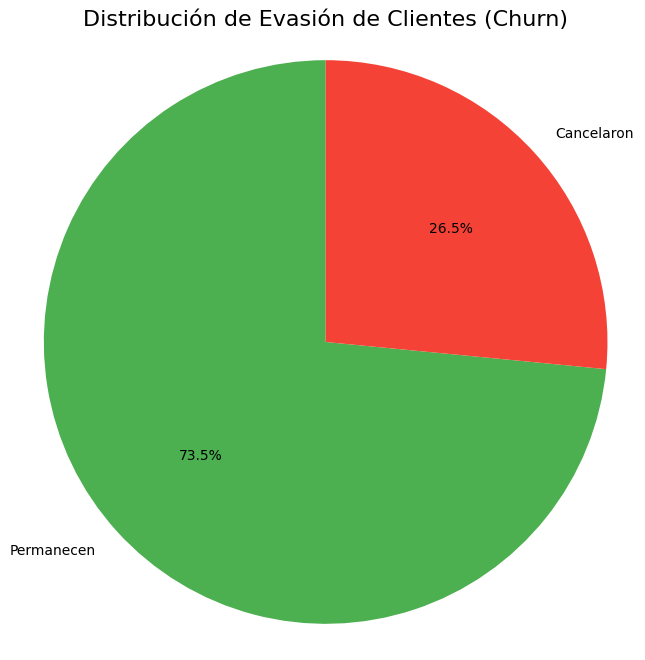

In [18]:
import matplotlib.pyplot as plt
conteo_churn = datos_transformados['Churn'].value_counts()

#etiquetas para gráfico
etiquetas = ['Permanecen', 'Cancelaron']

plt.figure(figsize=(8, 8))
plt.pie(conteo_churn, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#F44336'])
plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=16)
plt.axis('equal')

plt.show()

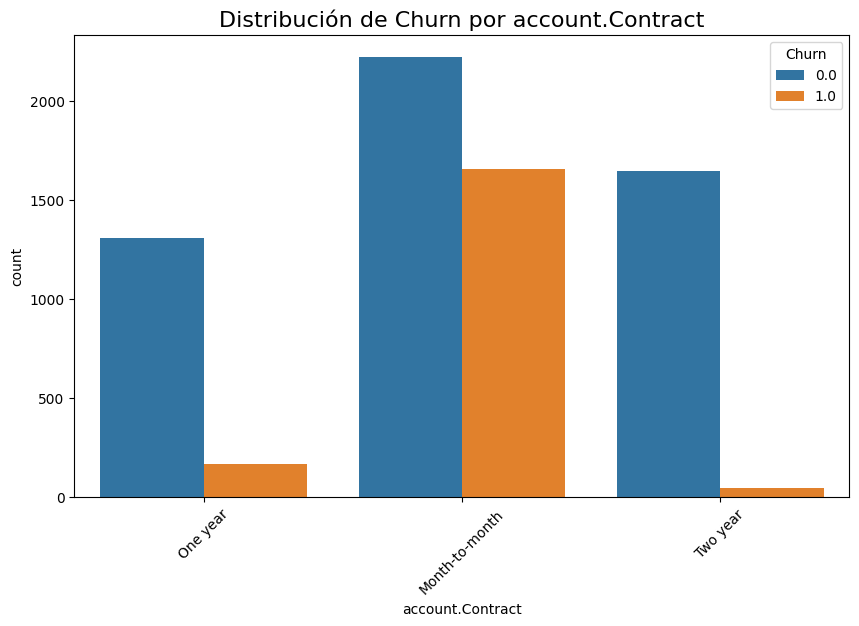

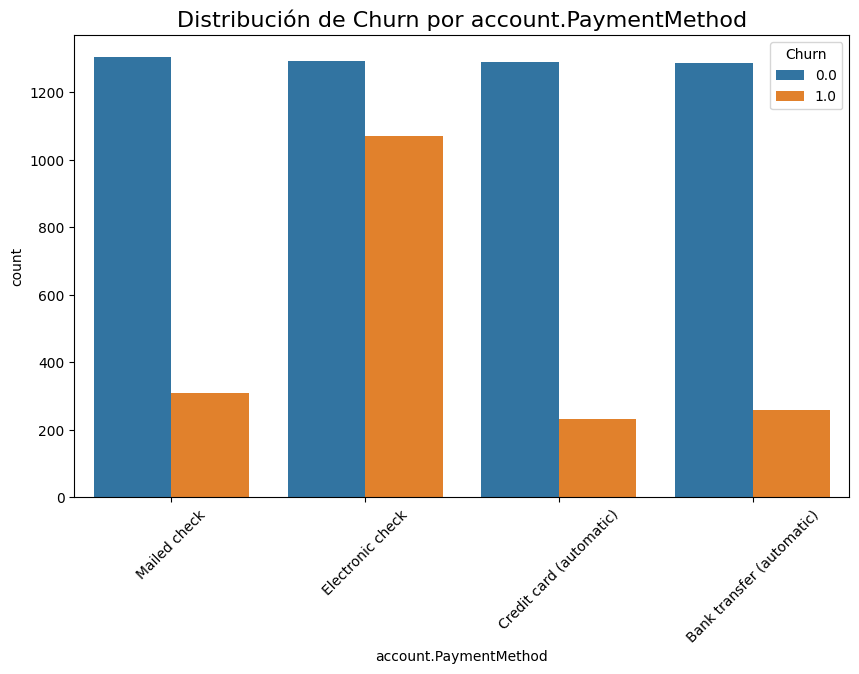

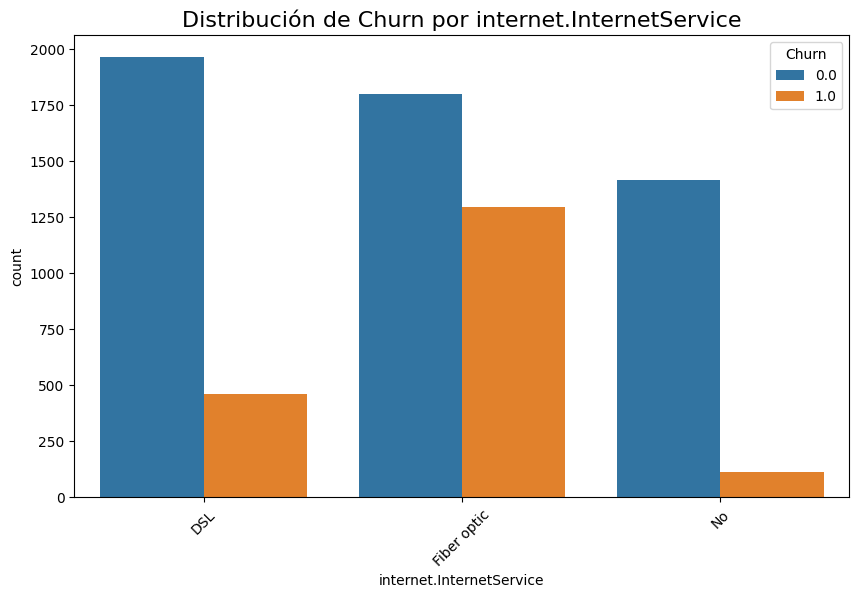

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

columnas_categoricas = [
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService'
]

# Gráfico para cada Categoría
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))

    sns.countplot(x=columna, hue='Churn', data=datos_transformados)
    plt.title(f'Distribución de Churn por {columna}', fontsize=16)
    plt.xticks(rotation=45)

    plt.show()

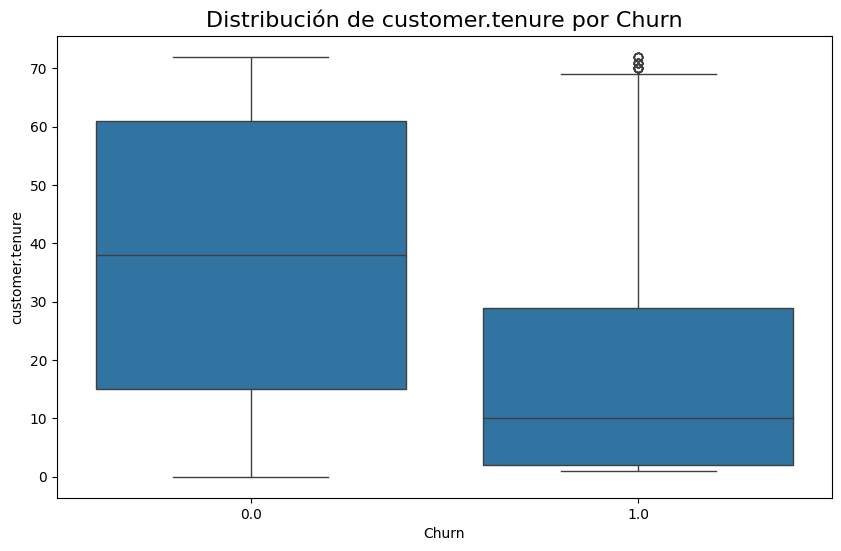

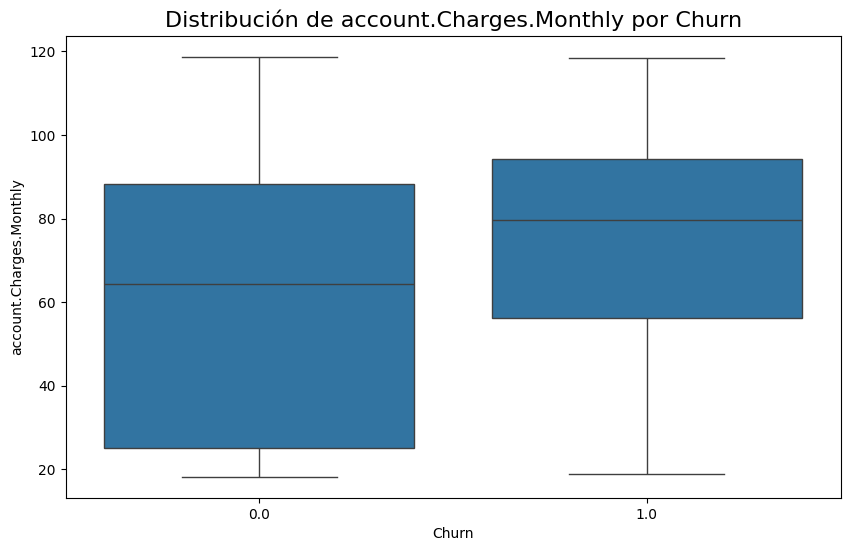

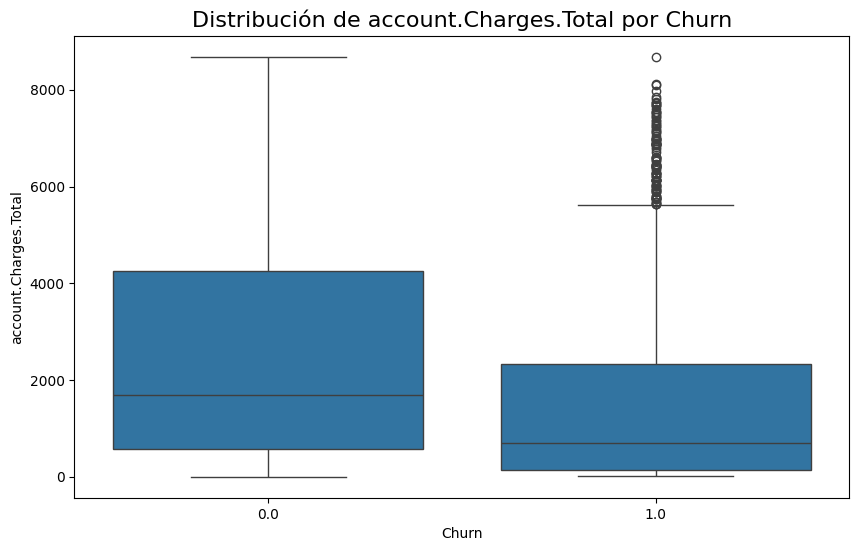

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas numéricas por analizar
columnas_numericas = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

#  Gráfico para cada Variable Numérica
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))

    sns.boxplot(x='Churn', y=columna, data=datos_transformados)

    plt.title(f'Distribución de {columna} por Churn', fontsize=16)
    plt.show()

### Analisis de correlacion


 Análisis de Correlación 


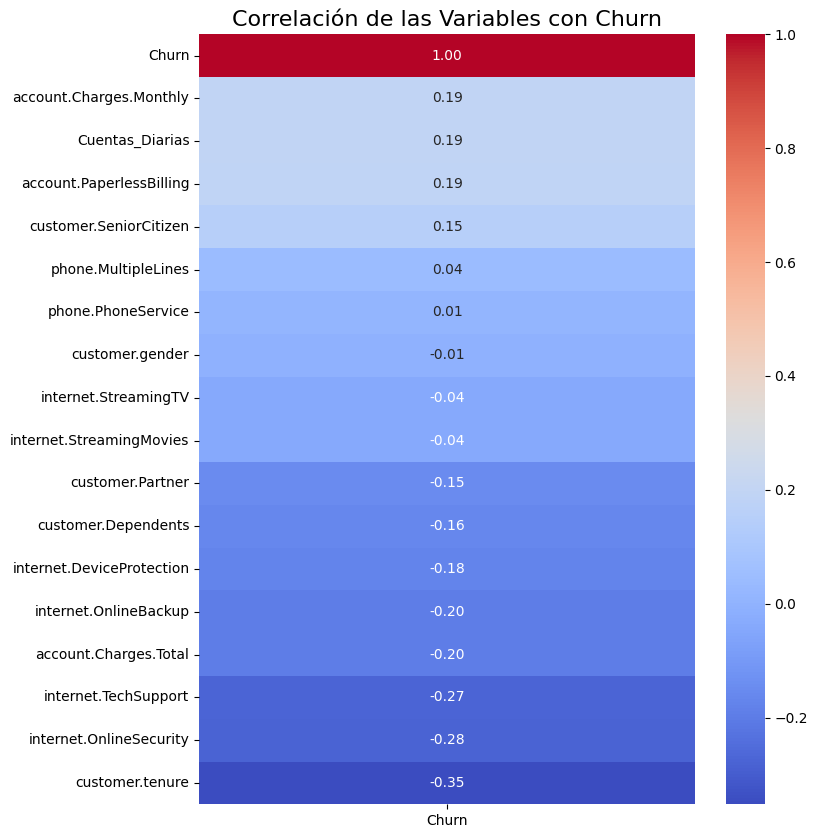

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

print(" Análisis de Correlación ")

# Calculamos la matriz de correlación completa
matriz_correlacion = datos_transformados.corr(numeric_only=True)

# Las ordenamos de mayor a menor para ver las más importantes
correlacion_churn = matriz_correlacion[['Churn']].sort_values(by='Churn', ascending=False)

# 3. Creamos el mapa de calor (heatmap) para visualizar estas correlaciones
plt.figure(figsize=(8, 10))

sns.heatmap(correlacion_churn,
            annot=True,     # Muestra los números dentro de las celdas
            cmap='coolwarm',# Usamos un mapa de colores "frío/caliente"
            fmt=".2f")      # Formatea los números a 2 decimales

plt.title('Correlación de las Variables con Churn', fontsize=16)

plt.show()

#📄Informe final

## Parte 2 del Desafio

# Extraccion de archivo tratado


In [22]:
# Asumiendo que tu DataFrame limpio se llama 'datos_transformados'
datos_transformados.to_csv("churn_datos_tratados.csv", index=False)

print("¡Archivo 'churn_datos_tratados.csv' guardado exitosamente!")

¡Archivo 'churn_datos_tratados.csv' guardado exitosamente!


# Carga y eliminacion

In [23]:
import pandas as pd

#Se cargan los datos tratados desde el archivo CSV
df = pd.read_csv("churn_datos_tratados.csv")

print("Datos tratados cargados exitosamente.")
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Se eliminan las columnas Irrelevantes
df_modelado = df.drop('customerID', axis=1)

print("\nSe ha eliminado la columna 'customerID'.")
print(f"El nuevo dataset para modelado tiene {df_modelado.shape[0]} filas y {df_modelado.shape[1]} columnas.")

# Mostramos una vista previa de nuestro dataset listo para el siguiente paso
print("\nVista previa del dataset para modelado:")
display(df_modelado.head())

Datos tratados cargados exitosamente.
El dataset tiene 7267 filas y 22 columnas.

Se ha eliminado la columna 'customerID'.
El nuevo dataset para modelado tiene 7267 filas y 21 columnas.

Vista previa del dataset para modelado:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0.0,0,0,1,1,9,1,0.0,DSL,0.0,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0.0,1,0,0,0,9,1,1.0,DSL,0.0,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1.0,1,0,0,0,4,1,0.0,Fiber optic,0.0,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,1,1,1,0,13,1,0.0,Fiber optic,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,0,1,1,0,3,1,0.0,Fiber optic,0.0,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


# Encoding/ codificacion

In [25]:
# Aplicamos One-Hot Encoding al DataFrame df_modelado para quepandas identificará automáticamente las columnas de tipo 'object' y las codificará.
df_codificado = pd.get_dummies(df_modelado, drop_first=True)

print("Dataset después del Encoding ")
print(f"El número de columnas ha aumentado de {df_modelado.shape[1]} a {df_codificado.shape[1]}.")

print("\nVista previa del dataset codificado:")
display(df_codificado.head())

print("\n Información actualizada del DataFrame ")
df_codificado.info()

Dataset después del Encoding 
El número de columnas ha aumentado de 21 a 25.

Vista previa del dataset codificado:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0.0,0,0,1,1,9,1,0.0,0.0,1.0,...,65.6,593.30,2.186667,False,False,True,False,False,False,True
1,0.0,1,0,0,0,9,1,1.0,0.0,0.0,...,59.9,542.40,1.996667,False,False,False,False,False,False,True
2,1.0,1,0,0,0,4,1,0.0,0.0,0.0,...,73.9,280.85,2.463333,True,False,False,False,False,True,False
3,1.0,1,1,1,0,13,1,0.0,0.0,1.0,...,98.0,1237.85,3.266667,True,False,False,False,False,True,False
4,1.0,0,1,1,0,3,1,0.0,0.0,0.0,...,83.9,267.40,2.796667,True,False,False,False,False,False,True



 Información actualizada del DataFrame 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   float64
 1   customer.gender                                7267 non-null   int64  
 2   customer.SeniorCitizen                         7267 non-null   int64  
 3   customer.Partner                               7267 non-null   int64  
 4   customer.Dependents                            7267 non-null   int64  
 5   customer.tenure                                7267 non-null   int64  
 6   phone.PhoneService                             7267 non-null   int64  
 7   phone.MultipleLines                            6560 non-null   float64
 8   internet.OnlineSecurity                        5686 non-null   float64
 9   internet.On

#  Proporción de Cancelación (Churn)

--- Proporción de Clases en la Variable 'Churn' ---
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


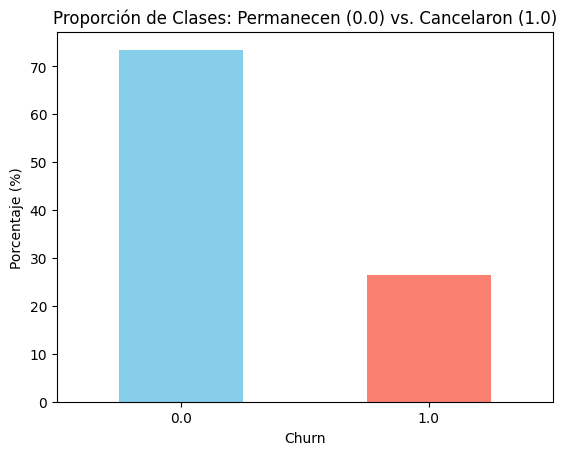

In [26]:
# Usamos value_counts() con normalize=True para obtener los porcentajes
proporcion_churn = df_codificado['Churn'].value_counts(normalize=True) * 100

print("--- Proporción de Clases en la Variable 'Churn' ---")
print(proporcion_churn)

proporcion_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proporción de Clases: Permanecen (0.0) vs. Cancelaron (1.0)')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.show()

# Separacion de datos

In [27]:
from sklearn.model_selection import train_test_split

# Eliminamos las filas donde 'Churn' es NaN.
df_final = df_codificado.dropna(subset=['Churn'])
print(f"Se eliminaron las filas con Churn nulo. Nuevo total de filas: {len(df_final)}")

y = df_final['Churn']

X = df_final.drop('Churn', axis=1)


#Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n Verificación de la Separación de Datos")
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del objetivo de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del objetivo de prueba (y_test): {y_test.shape}")

Se eliminaron las filas con Churn nulo. Nuevo total de filas: 7043

 Verificación de la Separación de Datos
Tamaño del conjunto de entrenamiento (X_train): (5634, 24)
Tamaño del conjunto de prueba (X_test): (1409, 24)
Tamaño del objetivo de entrenamiento (y_train): (5634,)
Tamaño del objetivo de prueba (y_test): (1409,)


# Creación y Evaluación del Modelo 1: Random Forest

Modelo 1: Random Forest Classifier 
Entrenando el modelo Random Forest...
¡Entrenamiento completado!

Realizando predicciones sobre el conjunto de prueba...

 Evaluación del Rendimiento del Modelo 

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.87      1036
         1.0       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Matriz de Confusión:


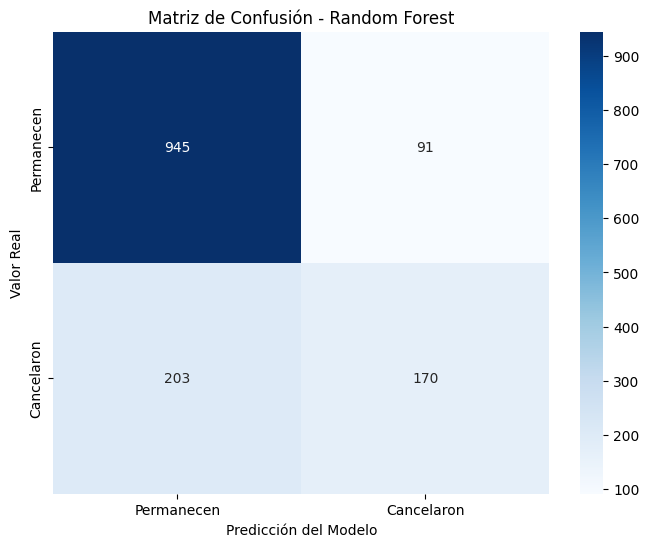

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Modelo 1: Random Forest Classifier ")

# Creación y Entrenamiento del Modelo
random_forest = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento.
print("Entrenando el modelo Random Forest...")
random_forest.fit(X_train, y_train)
print("¡Entrenamiento completado!")


# Realización de Predicciones
print("\nRealizando predicciones sobre el conjunto de prueba...")
y_pred_rf = random_forest.predict(X_test)


# Evaluación del Modelo
print("\n Evaluación del Rendimiento del Modelo ")

# a) Reporte de Clasificación (Accuracy, Precision, Recall, F1-score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# b) Matriz de Confusión
print("\nMatriz de Confusión:")
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualizamos la matriz de confusión con un mapa de calor para que sea más fácil de leer
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Permanecen', 'Cancelaron'], yticklabels=['Permanecen', 'Cancelaron'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Segundo Modelo

 Modelo 2: Regresión Logística con Imputación y Estandarización 
Valores NaN rellenados con la mediana.
Datos estandarizados.
Entrenando el modelo de Regresión Logística...
¡Entrenamiento completado!

Realizando predicciones sobre el conjunto de prueba...

 Evaluación del Rendimiento del Modelo 

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Matriz de Confusión:


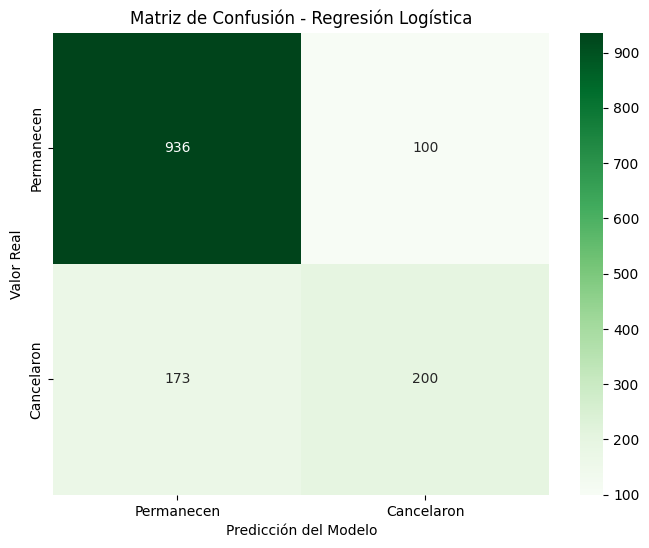

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(" Modelo 2: Regresión Logística con Imputación y Estandarización ")


# Se creo un  'imputador' que rellenará los NaN con la mediana de cada columna.
imputer = SimpleImputer(strategy='median')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

print("Valores NaN rellenados con la mediana.")

#  Estandarización de los Datos (ahora sobre los datos ya imputados)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print("Datos estandarizados.")

#  Creación y Entrenamiento del Modelo
log_reg = LogisticRegression(random_state=42)

print("Entrenando el modelo de Regresión Logística...")
log_reg.fit(X_train_scaled, y_train)
print("¡Entrenamiento completado!")

# Realización de Predicciones
print("\nRealizando predicciones sobre el conjunto de prueba...")
y_pred_lr = log_reg.predict(X_test_scaled)

# evaluación del Modelo
print("\n Evaluación del Rendimiento del Modelo ")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))

print("\nMatriz de Confusión:")
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', xticklabels=['Permanecen', 'Cancelaron'], yticklabels=['Permanecen', 'Cancelaron'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Interpretación y Conclusión Estratégica

/tmp/ipython-input-121866148.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importancias, palette='viridis')


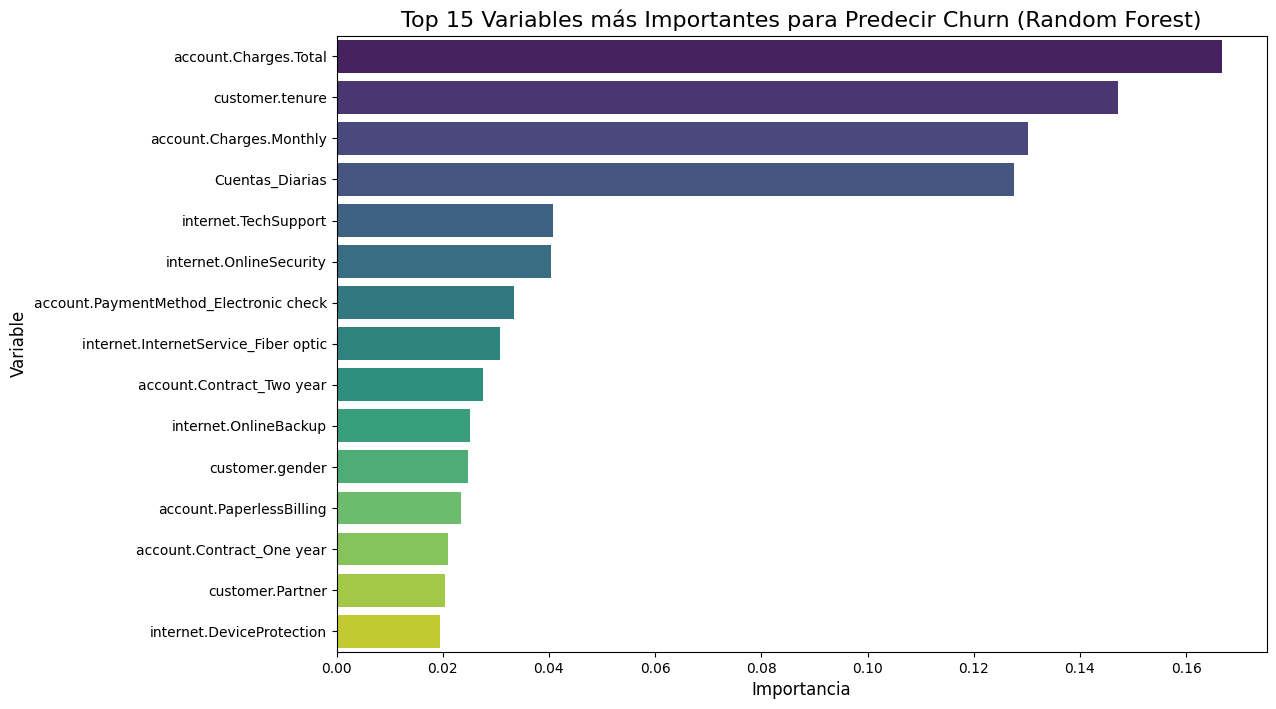

In [31]:
# El modelo 'random_forest' ya está entrenado, así que podemos acceder a sus atributos.
importancias = random_forest.feature_importances_
nombres_features = X_train.columns

# Creamos un DataFrame para visualizar mejor las importancias
df_importancias = pd.DataFrame({'Feature': nombres_features, 'Importance': importancias})

# Ordenamos el DataFrame por importancia de mayor a menor
df_importancias = df_importancias.sort_values(by='Importance', ascending=False).head(15)


# --- Creamos el Gráfico de Barras ---
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias, palette='viridis')

plt.title('Top 15 Variables más Importantes para Predecir Churn (Random Forest)', fontsize=16)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()